<a href="https://colab.research.google.com/github/somyaup/Desulphurisation-using-Gradient-descent/blob/main/Desulpherisatio_Hackathorn_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install utils

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
import os
import pickle
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
#tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


In [ ]:
def build_model():
    # build your model here return the model
    # you can change the function arguments as per need
    # a sample is provided for your reference
    '''
    clf = LinearRegression()
    clf.fit(X,y)
    '''
    model = Sequential([
        Dense(1024, input_shape = (12,), activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(11, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    return model


build_model().summary()

TypeError: ignored

In [ ]:
def test_model(model,X):
    # write the code that generates prediction, given the dataset here
    # do not change the arguments of the function
    # the model object can itself be a function
    # if there is binning, transformations or clustering of the data, they should happen here as well
    # a sample is provided for your reference

    predictions =  model.predict(X_test)
    
    return predictions

In [ ]:
def get_model():
    
    model = Sequential([
        Dense(1024, input_shape = (12,), activation = 'relu'),
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(11, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 1024)              13312     
_________________________________________________________________
dense_204 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_205 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_206 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_207 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_208 (Dense)            (None, 11)                715       
_________________________________________________________________
dense_209 (Dense)            (None, 1)               

In [ ]:
## set the seed to make your partition reproducible
## do not change the seed, this would make a lot of things a lot more difficult than it needs to  be
random_seed = 42
random.seed(random_seed)

'''
do not change this code
the snippet generates the datasets for modelling
'''

# reading the data from the given raw file
raw_dat = pd.read_csv('DSDataLastThreeMonths.csv')
# removing null values for further analysis
raw_dat = raw_dat.dropna().reset_index()

# extracting the independent variable, X
x_data = raw_dat.loc[:,['HM_WT', 'AIM_S', 'HM_S', 'HM_C', 'HM_SI', 'HM_TI','HM_MN', 'CAC2', 'MG', 'HM_TEMP', 'CAC2_INJ_TIME', 'MG_INJ_TIME']]
# extracting the dependent variable, y
y_data = raw_dat.loc[:,'DS_S']

# splitting the entire dataset into test and train
# for all model development, use only the train dataset
# do not touch the test dataset for any development purposes
# test dataset is purely for validation purposes

#X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)



In [ ]:
raw_dat.isna().sum()

index            0
CASTNO           0
HM_WT            0
AIM_S            0
HM_S             0
HM_C             0
HM_SI            0
HM_TI            0
HM_MN            0
CAC2             0
MG               0
HM_TEMP          0
CAC2_INJ_TIME    0
MG_INJ_TIME      0
DS_S             0
dtype: int64

In [ ]:

print ("size x=",x_data.size)
print ("size y=",y_data.size)
print("size parameters=",x_data.size/y_data.size)

size= 73128
size= 6094
size= 12.0


In [ ]:
x_data.head()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
0,171,0.005,0.040,4.572,0.518,0.069,0.040,347,49,1387.0,10,4
1,161,0.005,0.035,4.580,0.559,0.070,0.041,361,45,1386.0,10,4
2,170,0.005,0.042,4.590,0.468,0.044,0.036,355,52,1368.0,9,4
3,159,0.005,0.034,4.530,0.737,0.077,0.040,313,44,1401.0,9,4
4,162,0.005,0.042,4.560,0.443,0.056,0.037,360,55,1346.0,10,5


In [ ]:
x_avg=x_data.mean()
x_stdv=x_data.std()
x_norm=(x_data - x_data.mean()) / x_data.std()
x_norm.head()

,HM_WT,AIM_S,HM_S,HM_C,HM_SI,HM_TI,HM_MN,CAC2,MG,HM_TEMP,CAC2_INJ_TIME,MG_INJ_TIME
0,0.880223,0.023316,0.034549,0.178071,-0.564774,0.165607,-0.562042,-0.129579,-0.153903,-0.035854,0.358448,-0.767447
1,-0.703643,0.023316,-0.468902,0.327394,-0.318842,0.233403,-0.352467,0.101614,-0.580943,-0.062418,0.358448,-0.767447
2,0.721836,0.023316,0.235930,0.514048,-0.864691,-1.529291,-1.400343,0.002531,0.166377,-0.540578,-0.221579,-0.767447
3,-1.020416,0.023316,-0.569592,-0.605874,0.748864,0.707974,-0.562042,-0.691047,-0.687703,0.336048,-0.221579,-0.767447
4,-0.545256,0.023316,0.235930,-0.045913,-1.014650,-0.715740,-1.190768,0.085100,0.486656,-1.124996,0.358448,0.067998


In [ ]:
y_avg=y_data.mean()
y_stdv=y_data.std()
y_norm=(y_data - y_data.mean()) / y_data.std()
y_norm.head()

0    0.524052
1   -0.190234
2    1.952626
3    0.881196
4    1.952626
Name: DS_S, dtype: float64

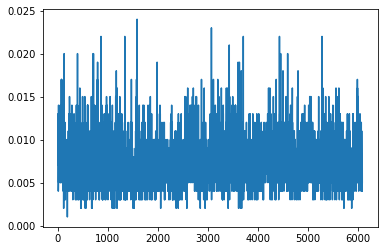

In [ ]:
plt.plot(y_data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.10, random_state=42)

In [ ]:
'''
write your code below
a sample code is provided for your reference
build your model under the name clf, or any other name of your choosing
build the model only on the train dataset
generate your prediction under the name pred_test and pred_train
'''

# build your model here
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)
model = get_model( )
'''
preds_on_untrained = model.predict(X_test)
clf = LinearRegression()
history=clf.fit(X_train,y_train)
'''
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 400,
    callbacks = [early_stopping]
)

# generate your predictions on test and train dataset
pred_test = test_model(model,X_test)
pred_train = test_model(model,X_train)

Epoch 1/400
172/172 [==============================] - 3s 15ms/step - loss: 0.9960 - val_loss: 0.9575
Epoch 2/400
172/172 [==============================] - 2s 12ms/step - loss: 0.9715 - val_loss: 0.9383
Epoch 3/400
172/172 [==============================] - 2s 13ms/step - loss: 0.9499 - val_loss: 0.9206
Epoch 4/400
172/172 [==============================] - 2s 13ms/step - loss: 0.9296 - val_loss: 0.9032
Epoch 5/400
172/172 [==============================] - 3s 15ms/step - loss: 0.9101 - val_loss: 0.8864
Epoch 6/400
172/172 [==============================] - 2s 14ms/step - loss: 0.8921 - val_loss: 0.8711
Epoch 7/400
172/172 [==============================] - 2s 13ms/step - loss: 0.8755 - val_loss: 0.8565
Epoch 8/400
172/172 [==============================] - 2s 13ms/step - loss: 0.8601 - val_loss: 0.8427
Epoch 9/400
172/172 [==============================] - 2s 12ms/step - loss: 0.8458 - val_loss: 0.8300
Epoch 10/400
172/172 [==============================] - 2s 14ms/step - loss: 0.832

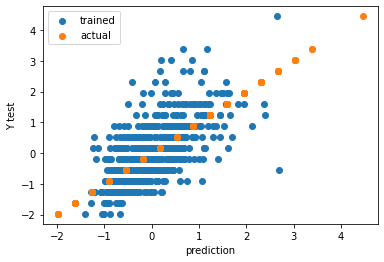

In [ ]:
preds_on_trained = model.predict(X_test)
#ys=y_stdv*tf.ones_like(y_test)
#ya=y_avg*tf.ones_like(y_test)
#y_test=y_test*ys + ya
plt.scatter(preds_on_trained[:],y_test[:])
plt.ylabel('Y test')
plt.xlabel('prediction')
plt.scatter(y_test,y_test)
plt.legend(['trained', 'actual'], loc='upper left')

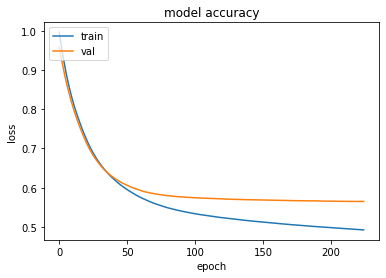

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
'''
do not change this code
the snippet generates the accuracy of the model
'''

#tolerance range
check = 0.002/y_avg

# findinf the error on the predictions
y_test = list(y_test)
y_train = list(y_train)
err_test = [x-y for x,y in zip(pred_test,y_test)]
err_train = [x-y for x,y in zip(pred_train,y_train)]

# finding the strike rates on the datasets
strike_rate_test = 100*sum([np.abs(x)<=check for x in err_test])/len(err_test)
strike_rate_train = 100*sum([np.abs(x)<=check for x in err_train])/len(err_train)

# printint the results
print("Test strike rate : {}\nTrain strike rate : {}".format(strike_rate_test,strike_rate_train))


Test strike rate : [29.18032787]
Train strike rate : [18.36065574]


In [ ]:
'''
do not change this code
the snippet saves the model generated
change the name of the file below to your team name
you should submit both the code and the file generated using the code below
'''
save_object = (model,test_model,strike_rate_test,strike_rate_train,random_seed)
pickle_out = open("team_name.pkl","wb")
pickle.dump(save_object, pickle_out)
pickle_out.close()